# 5. Support Vector Machines 

A Suport Vector Machine or SVM is a ML algorithm capable of performing linear or nonlinear classifications, regressions and even outlier detection. SVMs are suited for classification of complex but small to medium datasets.

## 5.1 Linear SVM Classification

If the classes are linearly separable the SVM model will separete the classes and stay as far away from the closest training instance as possible. This is called a **large margin classificaion**, the support vectors are the ones in the edge of the "street". SVM are sensitive to feature scales.

### 5.1.1 Soft Margin Classification

Hard margin classification only works if the data is linearly separable and is quite sensitive to outliers. To avoid these issues it's preferable to use a more flexible model. The **Soft Margin Classification** objective is to keep the street as wide as possible while limiting the margin variations.

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2,3)] #petal length and petal width
y = (iris['target'] == 2).astype(np.float64) #Iris-Virginica

#Hyperparameter C controls the weight between hard 
#and soft classification

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge"))
    ])

svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

## 5.2 Nonlinear SVM Classification

Many datasets are not linearly separable, one aproach to handling nonlinear datasets is to add more features such as polynomial features.

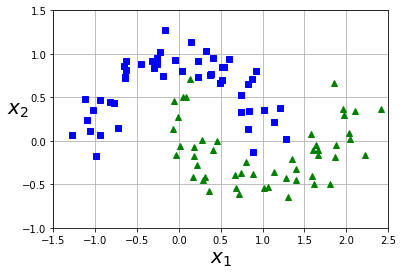

In [9]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X, y);

C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


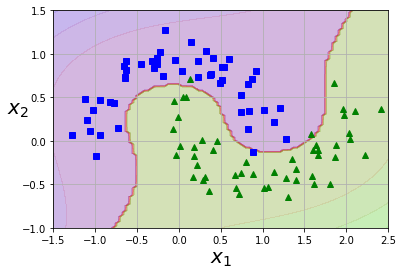

In [10]:
import matplotlib.pyplot as plt
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### 5.2.1 Polynomial Kernel

Adding polynomial features is useful but a high polynomial degree can create a huge number of features making the mode too slow. To solve this problem we can use the *kernel trick*.

In [11]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y);

## 5.3 SVM Regression

In SVM Regression the objective is to try to fit as many instances as possible insede the streed delimited by the support vectors while limiting margin violations. The width of the street is controlled by te hyperparameter $\epsilon$.

In [15]:
from sklearn.svm import LinearSVR
#For a lineal regression
svm_reg = LinearSVR(epsilon=0.1)
svm_reg.fit(X,y);

from sklearn.svm import SVR
#For a non lineal regression
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='auto')
svm_poly_reg.fit(X,y);